In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1(a)

(a) From the Hubble Space Telescope ACS Globular Cluster Survey website (http://www.astro.ufl.edu/~ata/public_hstgc/), download the photometry for M92 (NGC 6341). Plot its color magnitude diagram (CMD) in the ACS/WFC F606W and F814W filters.

In [86]:
#load the photometry file
phot = np.genfromtxt('NGC6341R.RDVIQ.cal.adj.zpt.txt', unpack = True)

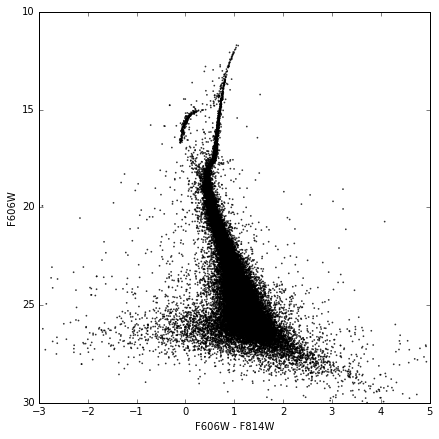

In [85]:
#plot the color magnitude diagram
alph = 0.8
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(phot[3]-phot[7], phot[3],  s = 3., color = 'black', alpha = alph, edgecolor = 'None')
ax.set_xlim(-3, 5)
ax.set_ylim(30,10)
ax.set_xlabel('F606W - F814W')
ax.set_ylabel('F606W')
plt.show()

## Problem 1(b)

Using information from NED (http://ned.ipac.caltech.edu), and assuming F606W ~ R-band and F814W ~ I-band, find and plot an isochrone from the MIST stellar evolution library (http://waps.cfa.harvard.edu/MIST/) that best fits the CMD of M92. In this exercise, consider adjusting the distance, age, metallicity, and/or extinction. You should consider models that have an age and metallicity resolution of log(age) = 0.05 dex and [M/H] = 0.05 dex. You may adopt arbitrarily strong priors on any of the parameters, as long as you explicitly justify them. It is acceptable to do this problem in a 'chi-by-eye' sense, but it may be more efficient to write a simple, automated isochrone fitting routine. Your choice.

From Wikipedia, I found that the globular cluster M92 is very metal poor, with Fe/H = -2.16, an age of 14.2 $ \pm $ 1.2 Gyr and a distance of 8.2 kpc. Also, the MIST models use a Kroupa IMF.

Now, I will select a section of the CMD not affected by binary spreading. For this, I've decided to cut off the CMD at the 19th magnitude, leaving the red giant branch and Main Sequence turn off for isochrone fitting.

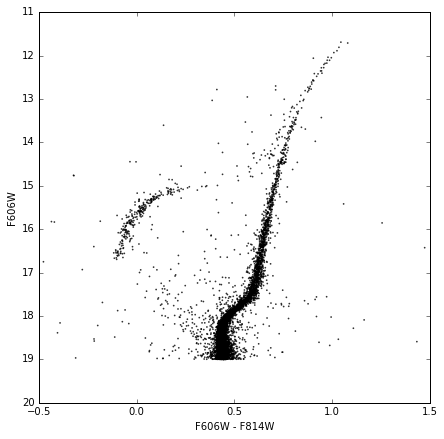

In [87]:
keep = np.where(phot[3]<19)[0]
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter((phot[3]-phot[7])[keep], phot[3][keep],  s = 3., color = 'black', alpha = alph, edgecolor = 'None')
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(20,11)
ax.set_xlabel('F606W - F814W')
ax.set_ylabel('F606W')
plt.show()

# Varying Metallicity

The plot below shows 3 isochrones with varying Fe/H values. Each isochrone has the same age (log10(age) = 10.15) and extinction (Av = 0.1). The plot below demonstrates the effect that metallicity has on isochrones. 

Because I'm using the 'chi by eye' method, I sampled different metallicity values with the resolution requested in the question. The values for metallicity were chosen using the reported Fe/H in Wikipedia (meaning I only sampled isochrones fairly close to Fe/H = -2.16). I found that Fe/H = -2.21 appeared to fit the data best. To demonstrate varying metallicity values, I've plotted 3 isochrones below.

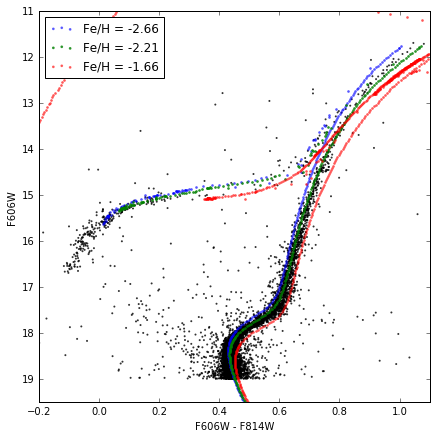

In [94]:
#load the MIST isochrone files
iso_cmd_met_266 = np.loadtxt('MIST_met_-266.iso.cmd', unpack = True)
iso_cmd_met_166 = np.loadtxt('MIST_met_166.iso.cmd', unpack = True)
iso_cmd_met_221 = np.loadtxt('MIST_met_-2.21.iso.cmd', unpack = True)
iso_cmd_met_211 = np.loadtxt('MIST_met_211.iso.cmd', unpack = True)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter((phot[3]-phot[7])[keep], phot[3][keep],  s = 4., color = 'black', alpha = alph, edgecolor = 'None')
ax.scatter(iso_cmd_met_266[12]-iso_cmd_met_266[17], iso_cmd_met_266[12]+14.57, s =3., color = 'blue',label = "Fe/H = -2.66", alpha = 0.5)
ax.scatter(iso_cmd_met_221[12]-iso_cmd_met_221[17], iso_cmd_met_221[12]+14.57,s =3., color = 'green',label = "Fe/H = -2.21", alpha = 0.7)
#ax.scatter(iso_cmd_1av[12]-iso_cmd_1av[17], iso_cmd_1av[12]+14.57,s = 3., color = 'orange',label = 'Fe/H = -2.16', alpha = 0.7)
#ax.scatter(iso_cmd_met_211[12]-iso_cmd_met_211[17], iso_cmd_met_211[12]+14.57,s =3., color = 'pink',label = "Fe/H = -2.11", alpha = 0.7)
ax.scatter(iso_cmd_met_166[12]-iso_cmd_met_166[17], iso_cmd_met_166[12]+14.57,s = 3., color = 'red',label = "Fe/H = -1.66", alpha = 0.5)
ax.set_ylim(19.5,11)
ax.set_xlim(-0.2, 1.1)
ax.set_xlabel('F606W - F814W')
ax.set_ylabel('F606W')
plt.legend(loc = 2)
plt.show()

Overall, I have found that an Fe/H ratio of -2.21 is the best fit. When doing this analysis I also exmained values of metallicity within 0.05 dex of -2.21, and it still seemed to best fit the data.

# Varying Extinction
Now, I examine different values of the extinction value Av to determine which is the best fit for the data. Here, each of these isochrones has a log(age) = 10.15 and an Fe/H of -2.21.

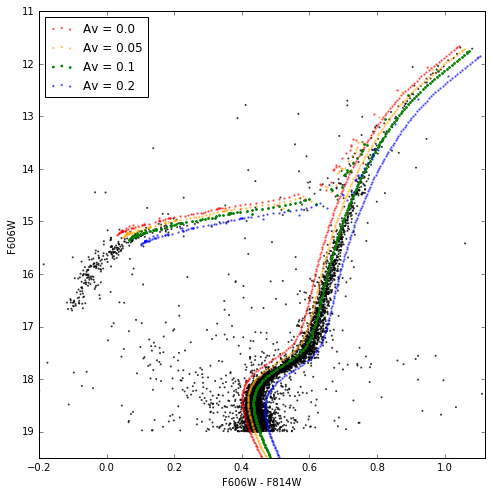

In [95]:
#load the isochrone files
iso_cmd_05av = np.loadtxt('MIST_iso_05av.iso.cmd', unpack = True) #Av = 0.05
iso_cmd_1av = np.loadtxt('MIST_.1av.iso.cmd', unpack = True) #Av = 0.1
iso_cmd_2av = np.loadtxt('MIST_0.2av.iso.cmd', unpack = True) #Av = 0.2
iso_cmd_10 = np.loadtxt('MIST_iso_1476308039.iso.cmd', unpack = True) #Av = 0

#F606W is column 12, F814W is col 17
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter((phot[3]-phot[7])[keep], phot[3][keep],  s = 4., color = 'black', alpha = alph, edgecolor = 'None')
ax.scatter(iso_cmd_10[12]-iso_cmd_10[17], iso_cmd_10[12]+14.57,s = 2., color = 'red', alpha = 0.5, label ='Av = 0.0')
ax.scatter(iso_cmd_05av[12]-iso_cmd_05av[17], iso_cmd_05av[12]+14.57,s = 2., color = 'orange', alpha = 0.5, label = 'Av = 0.05')
ax.scatter(iso_cmd_1av[12]-iso_cmd_1av[17], iso_cmd_1av[12]+14.57,s = 3., color = 'green', alpha = 1, label = 'Av = 0.1')
ax.scatter(iso_cmd_2av[12]-iso_cmd_2av[17], iso_cmd_2av[12]+14.57,s = 2., color = 'blue', alpha = 0.5, label = 'Av = 0.2')
ax.set_ylim(19.5,11)
ax.set_xlim(-0.2, 1.12)
ax.set_xlabel('F606W - F814W')
ax.set_ylabel('F606W')
plt.legend(loc =2)
plt.show()

Here, the best fit extinction seems to be Av = 0.1. While the Av = 0.05 isochrone fits the high magnitude end of the red giant branch better, the Av = 0.1 isochrone fits the top of the main sequence and main sequence turn off much better.

# Varying Age
Now I will vary the age to determine the best fit, using the Wikipedia value of 14.2 Gyr as my prior. For the other parameters, I use my best values found in the previous sections, Fe/H = -2.21, Av = 0.1, and distance = 8.2 kpc. 

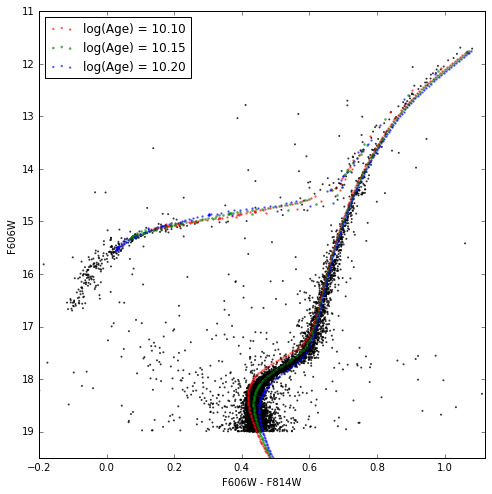

In [96]:
#load the isochrone files
iso_cmd_10_10 = np.loadtxt('MIST_.1av_221_10.10.iso.cmd', unpack = True) #log(Age) = 10.10
iso_cmd_10_15 = np.loadtxt('MIST_.1av_221_10.15.iso.cmd', unpack = True) #log(Age) = 10.15
iso_cmd_10_20 = np.loadtxt('MIST_.1av_221_10.20.iso.cmd', unpack = True) #log(Age) = 10.20

#F606W is column 12, F814W is col 17
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter((phot[3]-phot[7])[keep], phot[3][keep],  s = 4., color = 'black', alpha = alph, edgecolor = 'None')
ax.scatter(iso_cmd_10_10[12]-iso_cmd_10_10[17], iso_cmd_10_10[12]+14.57,s = 2., color = 'red', alpha = 0.5, label ='log(Age) = 10.10')
ax.scatter(iso_cmd_10_15[12]-iso_cmd_10_15[17], iso_cmd_10_15[12]+14.57,s = 3., color = 'green', alpha = 0.5, label ='log(Age) = 10.15')
ax.scatter(iso_cmd_10_20[12]-iso_cmd_10_20[17], iso_cmd_10_20[12]+14.57,s = 2., color = 'blue', alpha = 0.5, label ='log(Age) = 10.20')
ax.set_ylim(19.5,11)
ax.set_xlim(-0.2, 1.12)
ax.set_xlabel('F606W - F814W')
ax.set_ylabel('F606W')
plt.legend(loc =2)
plt.show()

While each isochrone appears to fit each part of the CMD in differing ways, overall the 14.2 Gyr (log(age) = 10.15) isochrone seems to be the best fit.

# Varying Distance
Now I will vary the distance to find what seems to be the best fit. For the other parameters I will use log(age) = 10.15, Fe/H = -2.21, Av = 0.1. For the prior, I use the value of 8.2 kpc reported in Wikipedia. I vary the distance by altering the distance modulus $m = M + 5log10(dist) -5$

Therefore, 

1. 7.8 kpc -> DM = 14.46
2. 8.2 kpc -> DM = 14.57
3. 8.6 kpc -> DM = 14.67


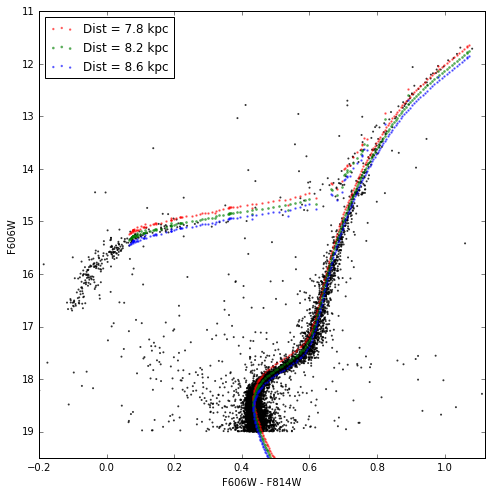

In [91]:
#load the isochrone file
iso_cmd = np.loadtxt('MIST_.1av_221_10.15.iso.cmd', unpack = True)

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter((phot[3]-phot[7])[keep], phot[3][keep],  s = 4., color = 'black', alpha = alph, edgecolor = 'None')
ax.scatter(iso_cmd[12]-iso_cmd[17], iso_cmd[12]+14.46,s = 2., color = 'red', alpha = 0.5, label ='Dist = 7.8 kpc')
ax.scatter(iso_cmd[12]-iso_cmd[17], iso_cmd[12]+14.57,s = 3., color = 'green', alpha = 0.5, label ='Dist = 8.2 kpc')
ax.scatter(iso_cmd[12]-iso_cmd[17], iso_cmd[12]+14.67,s = 2., color = 'blue', alpha = 0.5, label ='Dist = 8.6 kpc')
ax.set_ylim(19.5,11)
ax.set_xlim(-0.2, 1.12)
ax.set_xlabel('F606W - F814W')
ax.set_ylabel('F606W')
plt.legend(loc =2)
plt.show()

Here, due to the way that the isochrone traces the MSTO, the isochrone representing a distance of 8.2 kpc seems to be the best fit.

## Problem 1(c)
Repeat part (b), only using the PARSEC models (http://stev.oapd.inaf.it/cgi-bin/cmd).

For this problem, I varied many of the parameters to try to find an isochrone that best fit the data. The available ranges for parameters such as age and metallicity were more restricted than in the MIST model, which made finding a good fit challenging. For example, the estimated age that I found previously (14.2 Gyr) was out of bounds for the PARSEC models (I suppose PARSEC cares about the age of the universe or something). Additionally, there seems to be a bug that prevented data from being output into the data file when a certain value for Av was given. Therefore, I was unable to include extinction through the PARSEC code itself.

Overall, I found it impossible to fit both the high magnitude end of the RGB and the main sequence turn off simultaneously. Isochrones that fit the RGB well fit the MSTO terribly and had ages that were much outside a reasonable uncertainty range (~7-8 Gyr).

Additionally, from the previous section, I found a very low best fit metallicity (Fe/H = -2.21), a value that is outside the range of the PARSEC models (their minimum X/H = -2.18).

ALSO: On Saturday the website was working fine but when I tried to retrieve a few more isochrones on Sunday, all the output files were completely blank, not even the normal header.

In [110]:
#load the parsec isochrone files
parsec_isochrone = np.loadtxt('output502298339110.dat', unpack = True)
parsec_kroupa = np.loadtxt('parsec_kroupa.dat', unpack = True)
parsec_kroupa_new = np.loadtxt('output_2.2_1.3e10.dat', unpack = True)

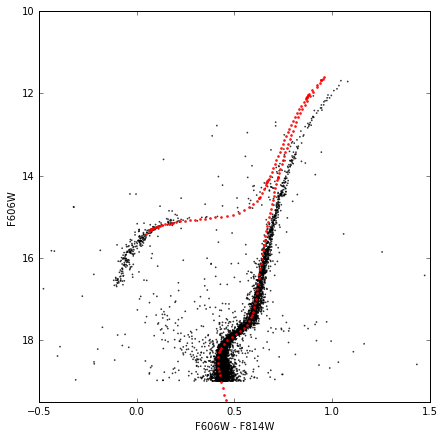

In [121]:
#parsec[13] = f606w, parsec[18] = f606w
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter((phot[3]-phot[7])[keep], phot[3][keep],  s = 3., color = 'black', alpha = alph, edgecolor = 'None')
ax.scatter((parsec_kroupa[13]-parsec_kroupa[18]), parsec_kroupa[13]+14.72,s =3., color = 'red', alpha = 0.8)
ax.set_ylim(19.5,10)
ax.set_xlim(-0.5, 1.5)
ax.set_xlabel('F606W - F814W')
ax.set_ylabel('F606W')
plt.show()

Above is the best isochrone fit I could find, with an age of 13 Gyr (near the maximum allowed), a metallicity of -2.0 and a distance of 8.7 kpc. The only parameter that changed significantly from the previous fitting is the distance, which increased by about 500 pc.

## Problem 1(d)

Describe the differences, if any, between best fitting PARSEC and MIST isochrones for M92. If there are differences, what might be their source? How do your best fit parameters compare with values from the literature?

The PARSEC isochrones were more difficult to fit reasonably well to the data. Whether due to the abundance of parameters, smaller possible parameter ranges or another factor, I was unable to fit a decent isochone to every portion of the CMD simultaneously. I've written more about the other challenges I came across with the PARSEC models above. Overall, the parameters I found from MIST matched the reported values in Wikipedia better than the PARSEC values.